# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [2]:
import os

In [3]:
main_dir =r"C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\dogs-vs-cats\train"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

In [4]:
from PIL import Image

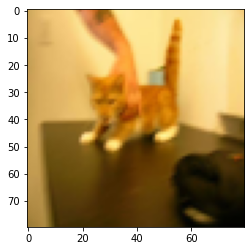

In [5]:
for p in os.listdir(path):
    category = p.split(".")[0]
    im = np.array(Image.open(os.path.join(path,p)).resize((80, 80)))
    plt.imshow(im)
    break

In [6]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        im = np.array(Image.open(os.path.join(path,p)).resize((80, 80)))
        X.append(im)
        y.append(category)

In [7]:
create_test_data(path)
l = np.array(X)
m = np.array(y)

In [8]:
l.shape,m.shape

((25000, 80, 80, 3), (25000,))

In [9]:
X=l
y=m

In [10]:
X.shape,y.shape

((25000, 80, 80, 3), (25000,))

In [11]:
#Normalize data
X = X/255.0

In [12]:
X.shape,y.shape

((25000, 80, 80, 3), (25000,))

In [13]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

Using TensorFlow backend.


In [14]:
image_size = 80
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)



In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])


In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 80, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 20, 128)       0   

In [17]:
model.fit(X, y, epochs=2, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 7220s 361ms/step - loss: 0.4830 - accuracy: 0.7627 - val_loss: 0.5782 - val_accuracy: 0.7046
Epoch 2/2
20000/20000 [==============================] - 5198s 260ms/step - loss: 0.3296 - accuracy: 0.8567 - val_loss: 0.4376 - val_accuracy: 0.7816


In [18]:
test_dir= r'C:\\Users\\nmrnt\\Desktop\\Data Science\\Sandy_deepLearning\\Projects\\dogs-vs-cats\\test1'
train_dir = "test1"
path = os.path.join(test_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        im = np.array(Image.open(os.path.join(path,p)).resize((80, 80)))
       # img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
       # new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(im)
create_test1_data(path)
#X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = np.array(X_test)
X_test = X_test/255

In [19]:
predictions = model.predict(X_test)

In [20]:
predicted_val = [int(round(p[0])) for p in predictions]

In [21]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [22]:
submission_df.to_csv("submission_vgg.csv", index=False)

In [23]:
submission_df.head()

,id,label
0,1,1
1,10,0
2,100,0
3,1000,1
4,10000,1


<AxesSubplot:>

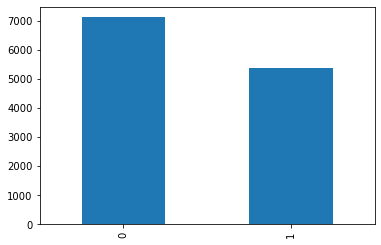

In [24]:
submission_df['label'].value_counts().plot.bar()
